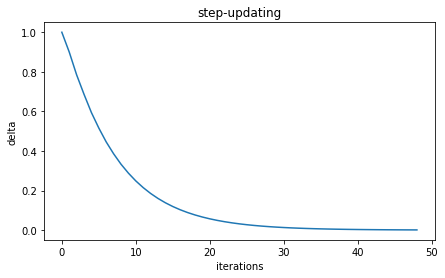

array([[ 0.        , -5.1411674 , -7.17285987, -7.7413128 ],
       [-5.12321528, -7.20448809, -7.3827336 , -7.30937349],
       [-7.11098526, -7.31342516, -6.68419683, -5.61145717],
       [-7.61533761, -7.06312063, -4.95830354,  0.        ]])

In [1]:
import mdp
import numpy as np
import plotting

def policy_eval_two_arrays():
    state_count=mdp.get_state_count()
    gamma=0.9
    theta=0.001 ##minimum value of delta
    delta_values=[]
    V = state_count*[0]
    while(True):
        delta=0
        V_t1=state_count*[0]
        for state in range(state_count):
            for actions in mdp.get_actions(state):
                next_state,reward,prob=mdp.get_state_transition(state,actions)
                V_t1[state]+=prob*(reward+gamma*V[next_state])
            delta=max(delta,abs(V_t1[state]-V[state]))
        delta_values.append(delta)
        V=V_t1
        if(delta<theta):
            break
    plotting.plot_values(delta_values,"step-updating")
    return V

V=policy_eval_two_arrays()
a=np.append(V,0)
a.reshape(4,4)


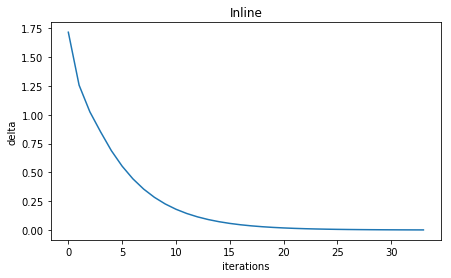

array([[ 0.        , -5.14243722, -7.17483689, -7.74357853],
       [-5.12451978, -7.20683545, -7.38528728, -7.31194749],
       [-7.11303016, -7.31599967, -6.6866908 , -5.61349498],
       [-7.61768368, -7.06570676, -4.96026827,  0.        ]])

In [2]:
def inline_updates():
    state_count=mdp.get_state_count()
    gamma=0.9
    theta=0.001 ##minimum value of delta
    delta_values=[]
    V = state_count*[0]
    while(True):
        delta=0
        for state in range(state_count):
            v=0;
            for actions in mdp.get_actions(state):
                next_state,reward,prob=mdp.get_state_transition(state,actions)
                v+=prob*(reward+gamma*V[next_state])
            delta=max(delta,abs(V[state]-v))
            V[state]=v
        delta_values.append(delta,)

        if(delta<theta):
            break
    plotting.plot_values(delta_values,"Inline")
    return V

V=inline_updates()
a=np.append(V,0)
a.reshape(4,4)

As shown In place updating converges quite faster than Two arrays update

In [3]:

def policy_iteration():
    state_count=mdp.get_state_count()
    gamma=0.9
    theta=0.001
    V=state_count*[0]
    pi=state_count*[0]
    cnt=0;
    for state in range(state_count):
        pi[state]=np.random.choice(mdp.get_actions(state))
    unstable=True

    while(unstable):

        while(True):
            cnt+=1
            delta=0
            for state in range(state_count):
                next_state,reward,prob=mdp.get_state_transition(state,pi[state])
                v=prob*(reward+gamma*V[next_state])
                delta=max(delta,abs(V[state]-v))
                V[state]=v

            if(delta<theta):
                break
        unstable=False

        for state in range(state_count):
            value_functio=[]
            for actions in mdp.get_actions(state):
                next_state,reward,prob=mdp.get_state_transition(state,actions)
                value_functio.append(prob*(reward+gamma*V[next_state]))
            next_optimal_action=mdp.get_actions(state)[np.argmax(value_functio)]
            if(next_optimal_action!=pi[state]):
                unstable=True
            pi[state]=next_optimal_action


    return V,pi,cnt

def value_iteration():
    state_count=mdp.get_state_count()
    gamma=0.9
    theta=0.001
    V=state_count*[0]
    pi=state_count*[0]
    cnt=0
    while(True):
        delta=0
        cnt+=1
        for state in range(state_count):
            v=[]
            for actions in mdp.get_actions(state):
                next_state,reward,prob=mdp.get_state_transition(state,actions)
                v.append(prob*(reward+gamma*V[next_state]))
            most_optimal=np.amax(v,axis=0)
            delta=max(delta,abs(most_optimal-V[state]))
            V[state]=most_optimal
        if delta<theta:
            break
    for state in range(state_count):
        value_functio=[]
        for actions in mdp.get_actions(state):
            next_state,reward,prob=mdp.get_state_transition(state,actions)
            value_functio.append(prob*(reward+gamma*V[next_state]))
        optimal_action=mdp.get_actions(state)[np.argmax(value_functio)]
        pi[state]=optimal_action
    return V,pi,cnt

def main():
    V,pi,cnt=policy_iteration()
    print("Following Policy Iteration Method\nCount:%s\n"%(cnt))
    print(np.append(V,0).reshape(4,4))
    print(np.append(pi,"down").reshape(4,4))
    V,pi,cnt=value_iteration()
    print("\nFollowing Value Iteration\nCount:%s\n"%(cnt))
    print(np.append(V,0).reshape(4,4))
    print(np.append(pi,"down").reshape(4,4))

if __name__=="__main__":
    main()


Following Policy Iteration Method
Count:11

[[ 0.       0.      -0.25    -0.30625]
 [ 0.      -0.25    -0.30625 -0.25   ]
 [-0.25    -0.30625 -0.25     0.     ]
 [-0.30625 -0.25     0.       0.     ]]
[['up' 'left' 'left' 'down']
 ['up' 'up' 'up' 'down']
 ['up' 'up' 'down' 'down']
 ['up' 'right' 'right' 'down']]

Following Value Iteration
Count:3

[[ 0.       0.      -0.25    -0.30625]
 [ 0.      -0.25    -0.30625 -0.25   ]
 [-0.25    -0.30625 -0.25     0.     ]
 [-0.30625 -0.25     0.       0.     ]]
[['up' 'left' 'left' 'down']
 ['up' 'up' 'up' 'down']
 ['up' 'up' 'down' 'down']
 ['up' 'right' 'right' 'down']]


As seen at each state the most optimal poilicy is towards maximizing the value function